In [1]:
import os
import os.path as op


import mne
from mne.io import read_raw_egi

In [2]:
# ścieżka do plików, podaj poprawną:
base_dir = r'C:\Users\mmagnus1\Desktop\warsztaty python\eeg'

# tworzymy listę plików
files = os.listdir(base_dir)
files[:3]

['CAT101 20130518 1906002.raw',
 'CAT112 20131113 2006002.raw',
 'CAT304 20130723 1522002.raw']

## Wiele *innych* plików w folderze - co wtedy?
Jeżeli w folderze z plikami (`base_dir`) jest wiele plików, a nie tylko pliki `*.set` możesz skorzystać z kilku opcji:

### list comprehension
Tak jest najprościej ale nie robiliśmy jeszcze list comprehensions:
```python
files = [f for f in files if f.endswith('.raw')
```

### `glob`
To rozwiązanie jest proste, ale jeżeli nie jesteśmy w danym folderze: 
* musimy skleić nazwę folderu (ze zmiennej `base_dir`) z `*.set`
* nasza lista plików może zawierać pełne ścieżki, więc późniejsza operacja `op.join(base_dir, file)` będą niepotrzebne.
```python
from glob import glob
files = glob(op.join(base_dir, '*.set'))
```

### `re` - regular expressions
Regular expressions to klasyczna maszynka do znajdywania podanych wzorców w napisach. To jest trochę trudniejsze, bo nie robiliśmy (i nie będziemy robić) modułu `re`, ani funkcji `filter`, która zwraca generator, o których też nie mówimy... :)
```python
import re
pattern = '.+\.raw'
reg = re.compile(pattern)
files = list(filter(reg.match, files))
```

In [4]:
# wybieramy nazwę pliku i zapisujemy w zmiennej `file`
file = files[1]
print(file) # tu muszę jeszcze znaleźć jakiś ładny plik

CAT112 20131113 2006002.raw


In [5]:
# łączymy nazwę pliku i ścieżkę:
file_path = op.join(base_dir, file)
print(file_path)

C:\Users\mmagnus1\Desktop\warsztaty python\eeg\CAT112 20131113 2006002.raw


In [6]:
# wczytujemy plik
raw = read_raw_egi(file_path, preload=True)
print('\n', raw)

Reading EGI header from C:\Users\mmagnus1\Desktop\warsztaty python\eeg\CAT112 20131113 2006002.raw...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
    Found multiple events at the same time sample. Cannot create trigger channel.
Reading 0 ... 189747  =      0.000 ...   758.988 secs...

 <RawEGI  |  CAT112 20131113 2006002.raw, n_channels x n_times : 73 x 189748 (759.0 sec), ~105.8 MB, data loaded>


## Tryb interaktywny
W tym miejscu zachęcam Was do włącznia trybu interaktywnego:
```python
%matplotlib
```
Ja jednak włączę tryb `inline` aby wykresy zapisywały się w notebooku (wtedy nie są interaktywne).

In [7]:
# uruchamiamy tryb interaktywny plotowania
%matplotlib inline

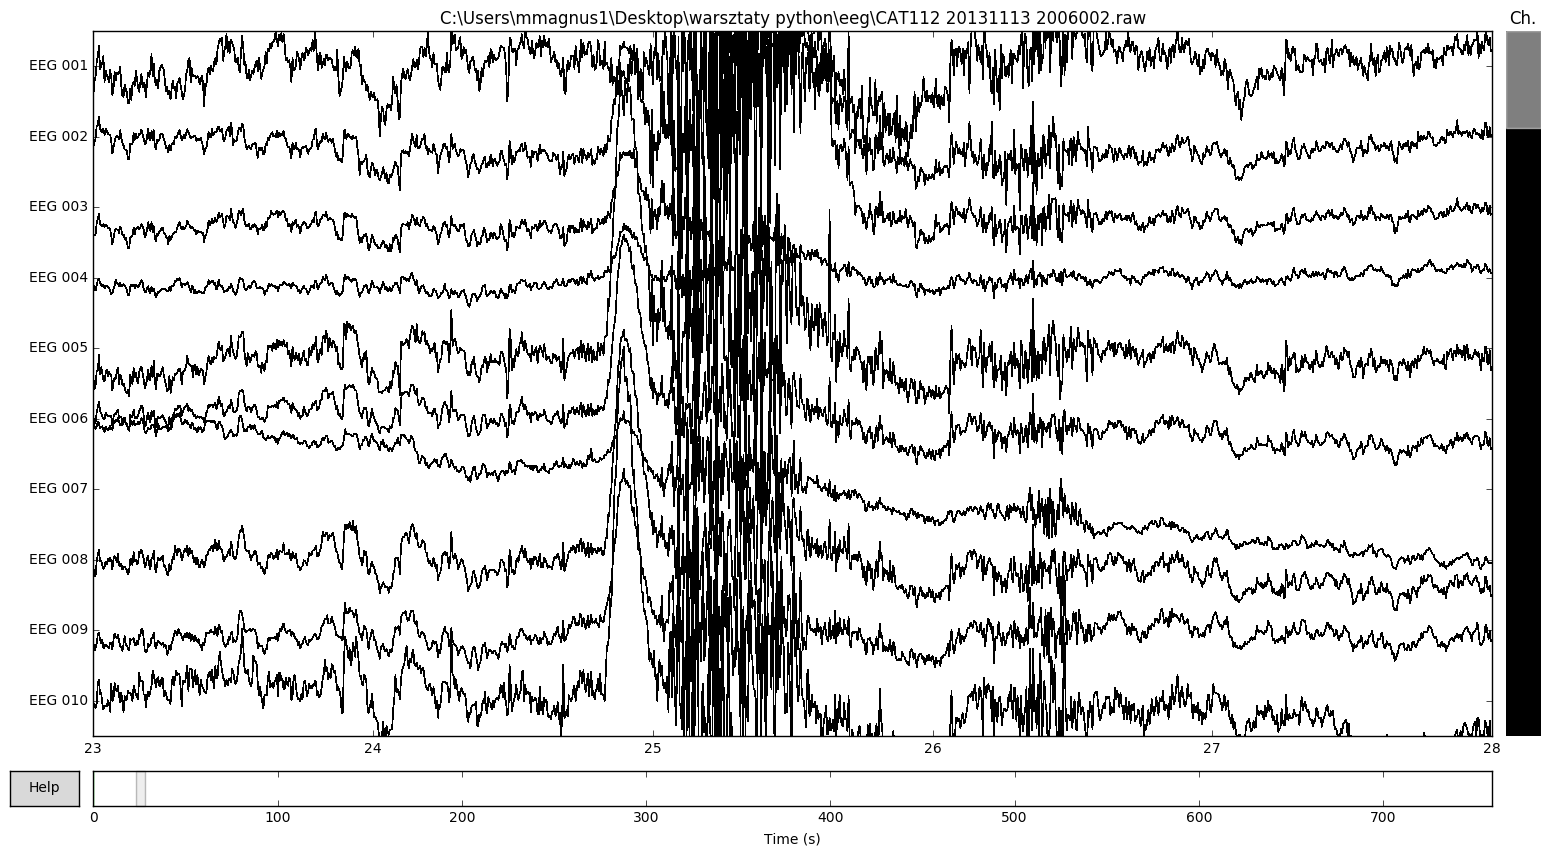

In [10]:
# wyświetlamy dane
raw.plot(duration=5., start=23., n_channels=10, order='original');

In [11]:
type(raw)

mne.io.egi.egi.RawEGI

In [12]:
raw._data.shape

(73, 189748)

In [13]:
# filtrujemy - uwaga! to zmienia na raw (tzw. operacja in-place)
raw.filter(1, None)

# jeżeli nie chcemy zmienić raw a zrobić filtrowanie
# na kopii i wrzucić do innej zmiennej, robimy:
# raw_flt = raw.copy().filter(1, None)

High-pass filtering at 1 Hz
Multiple deprecated filter parameters were used:
phase in 0.13 is "zero-double" but will change to "zero" in 0.14
fir_window in 0.13 is "hann" but will change to "hamming" in 0.14
lower transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
The default filter length in 0.13 is "10s" but will change to "auto" in 0.14


<ipython-input-13-0d38c37b7de3>:2: DeprecationWarning: Multiple deprecated filter parameters were used:
phase in 0.13 is "zero-double" but will change to "zero" in 0.14
fir_window in 0.13 is "hann" but will change to "hamming" in 0.14
lower transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
The default filter length in 0.13 is "10s" but will change to "auto" in 0.14
  raw.filter(1, None)


<RawEGI  |  CAT112 20131113 2006002.raw, n_channels x n_times : 73 x 189748 (759.0 sec), ~105.8 MB, data loaded>

Zwróćcie uwagę na komunikat `DeprecationWarning` - ostrzega nas, że w wersji 0.14 mne-python'a pewne domyślne wartości różnych argumentów nazwowych się zmienią.

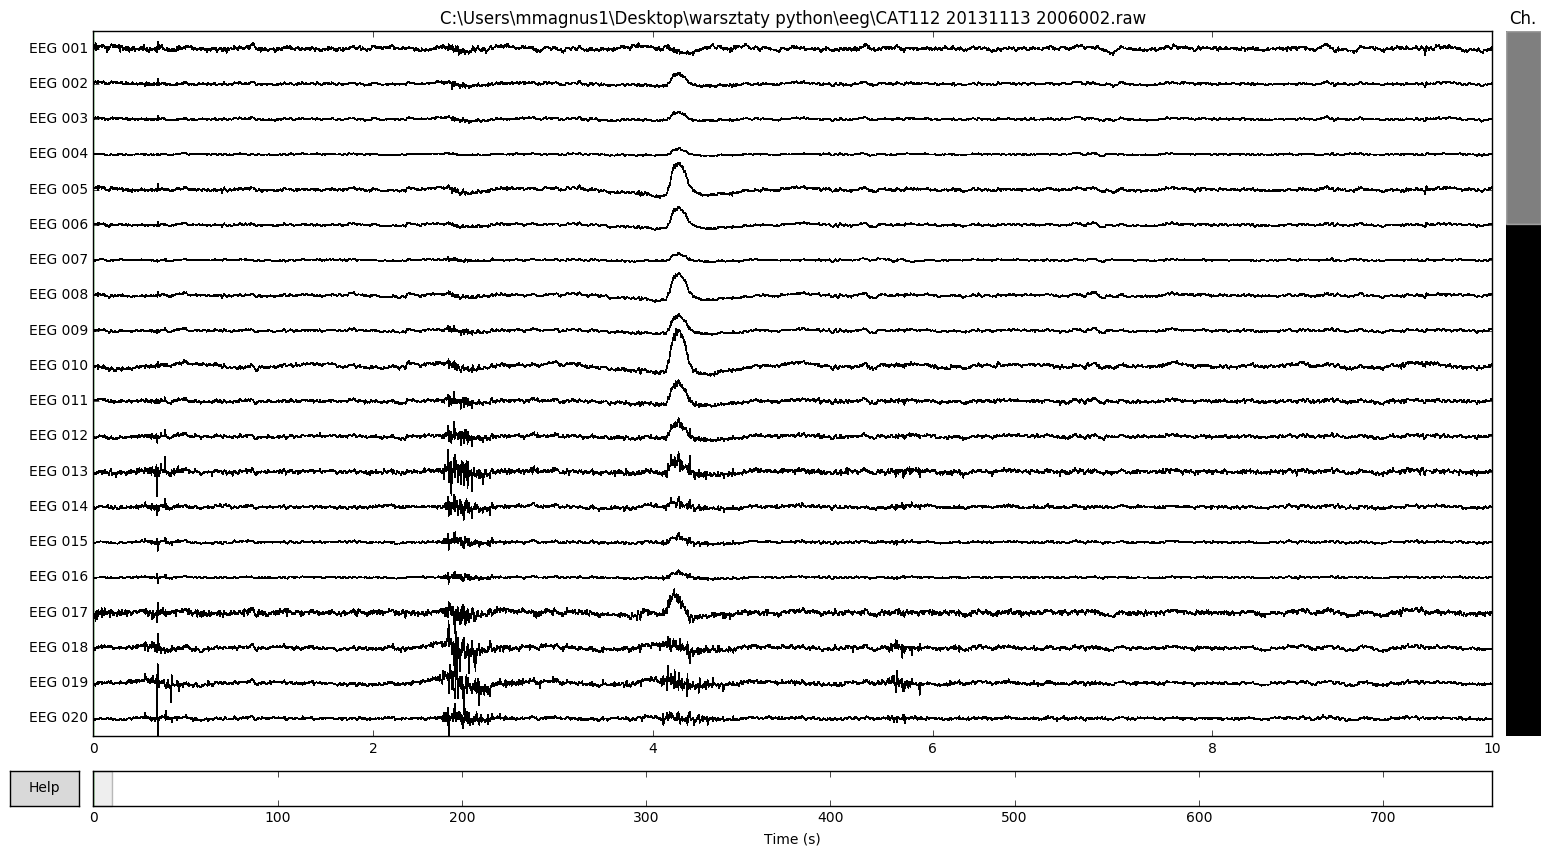

In [16]:
# chcemy mieć łądną skalę? proszę bardzo:
sc = dict(eeg='auto')
raw.plot(scalings=sc, order='original');

In [17]:
# sprawdzamy czy mamy pozycję kanałów, trochę wybiegając do przodu:
try:
    raw.plot_sensors()
    print('mamy pozycję elektrod!')
except RuntimeError:
    print('brak pozycji elektrod! :(')

brak pozycji elektrod! :(


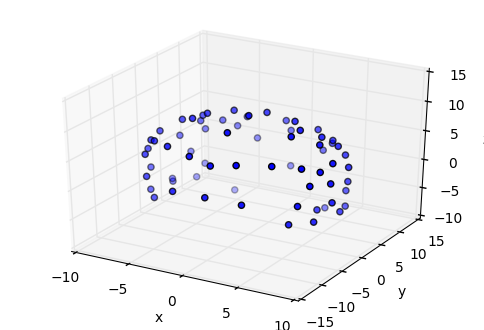

In [19]:
# wczytujmey montaż i wyświetlamy
montage = mne.channels.read_montage('GSN-HydroCel-65_1.0')
montage.plot();

In [21]:
# to nie zadziała, bo mamy złe nazwy kanałów:
raw.set_montage(montage)

ValueError: None of the sensors defined in the montage were found in the info structure. Check the channel names.

In [22]:
print('kanały w raw:\n', raw.ch_names[:8], '\n')
print('kanały w montage:\n', montage.ch_names[:8])

kanały w raw:
 ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008'] 

kanały w montage:
 ['FidNz', 'FidT9', 'FidT10', 'E1', 'E2', 'E3', 'E4', 'E5']


In [23]:
from mypy.chans import correct_egi_channel_names

correct_egi_channel_names(raw)
print(raw.ch_names[:8])

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8']


Teraz możemy spokojnie dodać montaż

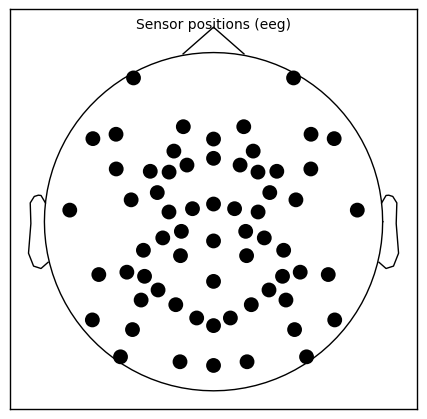

In [29]:
raw.set_montage(montage)
fig = raw.plot_sensors(show=False)
fig.axes[0].set_aspect('equal') # to jest tylko po to, bo mnie denerwuje rozciągnięcie głowy

Czas na eventy

In [34]:
from mypy.events import get_events_from_din

events = get_events_from_din(raw)
events

array([[   308,      0,    128],
       [   504,      0,     60],
       [   566,      0,     64],
       ..., 
       [184621,      0,     44],
       [184684,      0,     64],
       [184726,      0,      2]])

[65, 66, 67, 68, 69, 70, 71, 72]


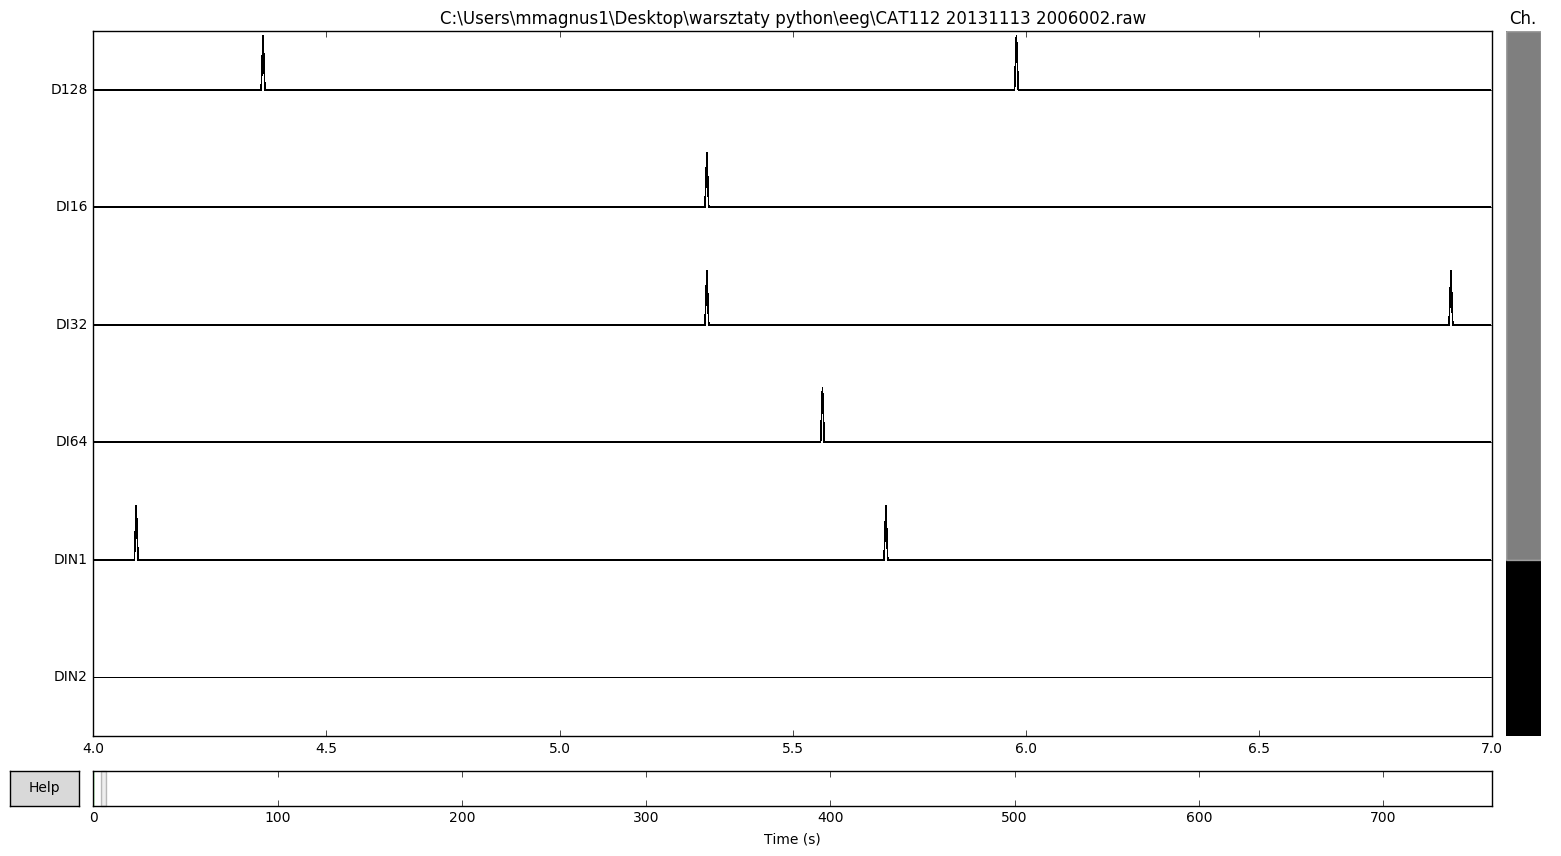

In [37]:
# te wartości pochodzą z kanałów z wydarzeniami:

# to jest list comprehension, na razie nie musicie rozumieć
# (wybieram w każdym razie indexy kanałów, które wyświetlę)
din_chans = [i for i, ch in enumerate(raw.ch_names) if ch.startswith('D')]
print(din_chans)

# tu wyświetlam wybrane kanały, kanały zaczynające się na 'D' - to są te z wydarzeniami
raw.plot(n_channels=6, start=4., duration=3., order=din_chans);

In [38]:
# co znaczają poszczególne wartości w ostatniej kolumnie? Tutaj macie słownik
# który tłumaczy opis eventów na ich wartości liczbowe:
event_id = {"response\left": 1, "response\right": 2,
            "response\space": 3, 
            "car/0": 36, "car/90": 40, "car/180": 44,
            "face/0": 52, "face/90": 56, "face/180": 60,
            "blank_screen": 64, "fixation": 128,
            "procedure_start": 192}

In [39]:
event_colors = {1: 'red', 2: 'green', 36: 'seagreen', 40: 'seagreen',
                44:  'seagreen', 52: 'crimson', 56: 'crimson', 60: 'crimson',
                128: 'yellow'}

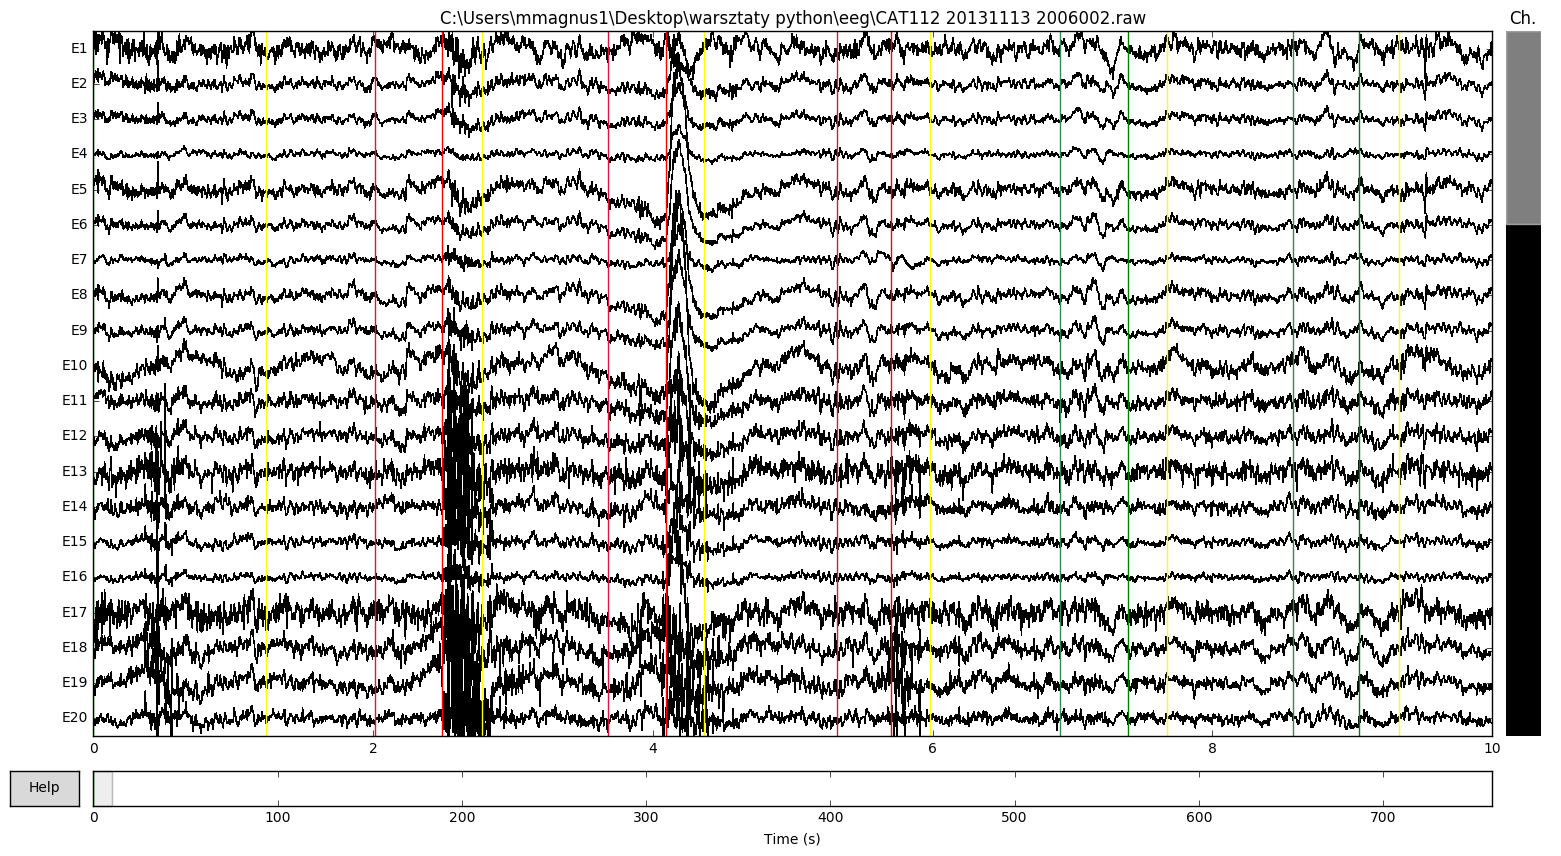

In [40]:
raw.plot(events=events, event_color=event_colors, order='original');

In [41]:
# teraz tworzymy słownik tylko z wydarzeniami względem, których będziemy epokować:
event_id = { "car/0": 36, "car/90": 40, "car/180": 44,
            "face/0": 52, "face/90": 56, "face/180": 60}

In [42]:
# epokujemy:
epochs = mne.Epochs(raw, events, tmax=0.75, tmin=-0.25,
                    event_id=event_id, preload=True)

409 matching events found
Applying baseline correction (mode: mean)
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
Adding average EEG reference projection.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 409 events and 251 original time points ...


<ipython-input-42-ee140f3801af>:3: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  event_id=event_id, preload=True)


0 bad epochs dropped


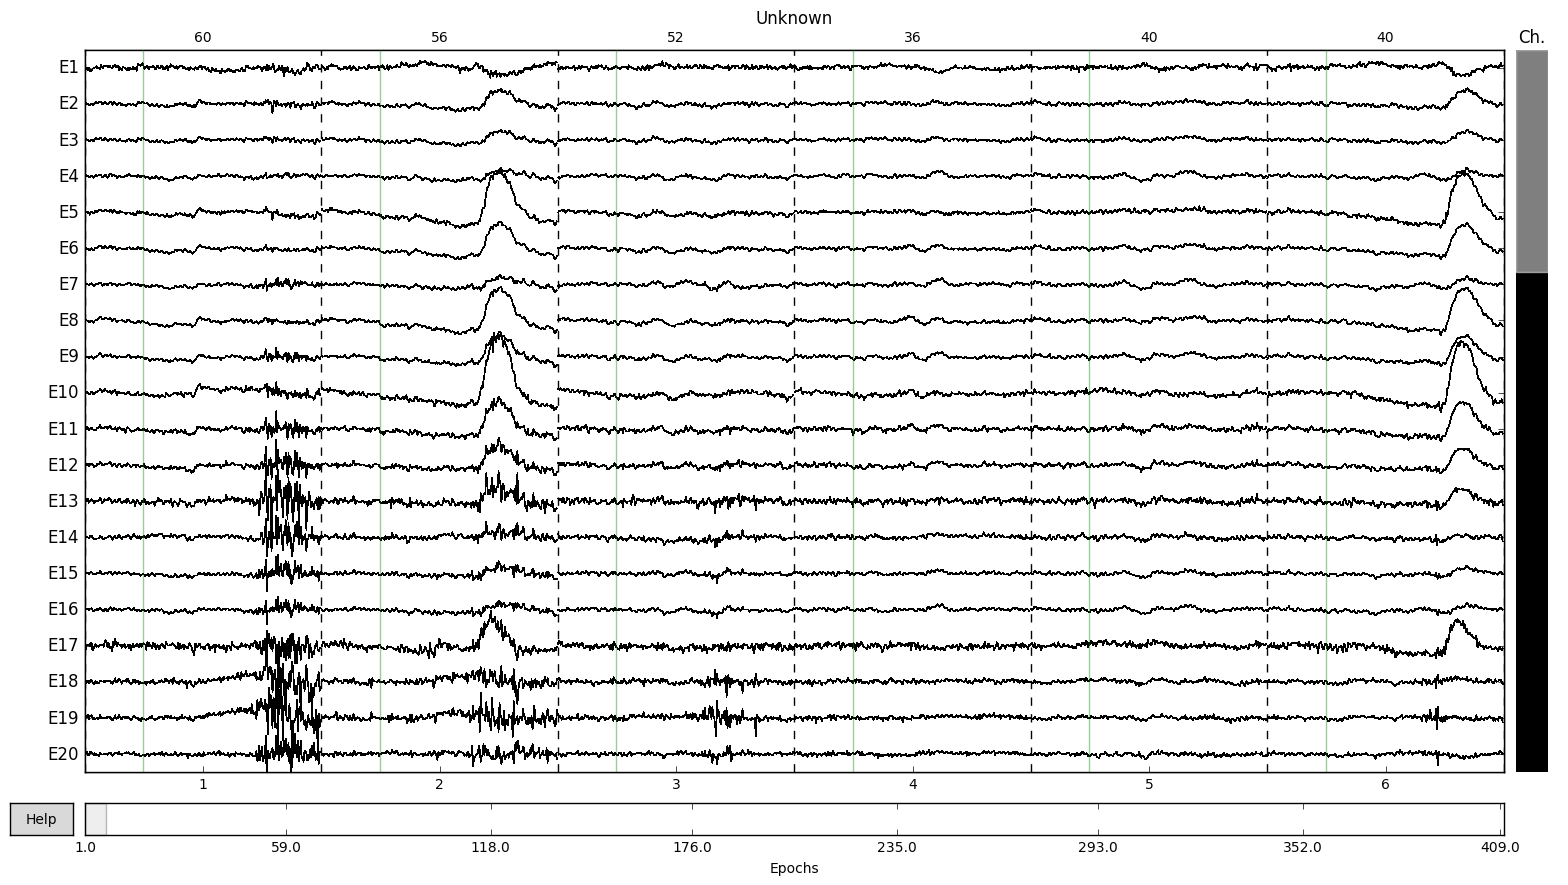

In [44]:
epochs.plot(n_epochs=6, scalings=sc);

In [45]:
# tutaj przyda się znaleźć lepszy plik do kolejnych kroków:

In [70]:
erp_face = epochs['face/0'].average()

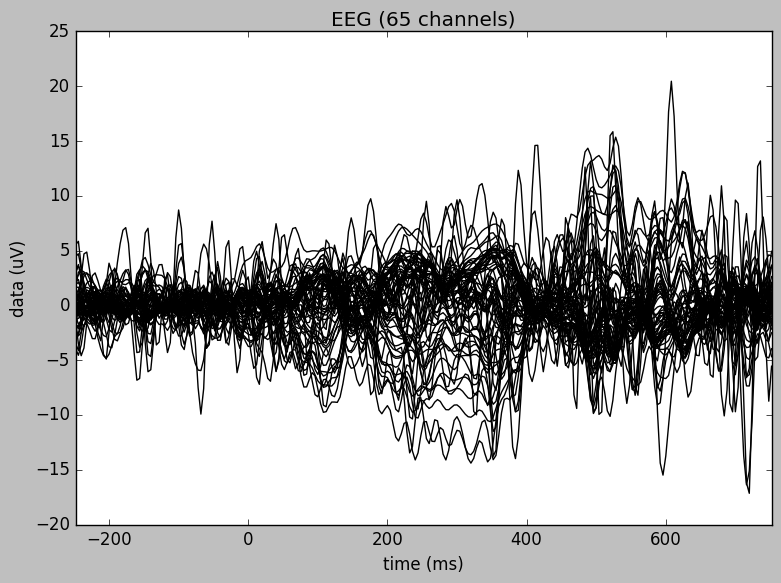

In [71]:
erp_face.plot()